**Libraries**

In [24]:
import warnings
warnings.filterwarnings('ignore')

Data Analysis

In [25]:
import numpy as np
import pandas as pd
import missingno as mn
from collections import Counter

Visualization

In [26]:
import matplotlib.pyplot as plt
import matplotlib.style as style
from matplotlib.colors import ListedColormap
from matplotlib import cm
import seaborn as sns
%matplotlib inline

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from IPython.display import display, HTML

WordCloud

In [27]:
from wordcloud import WordCloud

**Import and Inspection**

In [28]:
data = pd.read_csv('vgsales.csv')
display(data.head())
print("Database dimension     :",data.shape)
print("Database size          :",data.size)
display(data.describe())
display(data.info())

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Database dimension     : (16598, 11)
Database size          : 182578


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


None

**Null Inspection**

<AxesSubplot:>

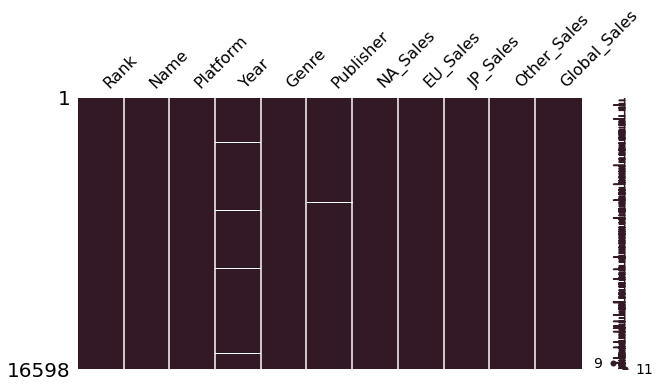

In [29]:
mn.matrix(data,figsize=(10, 5),color=(0.20, 0.10, 0.15),)

In [30]:
data['Year'].fillna(2006.0,inplace=True)
data['Publisher'].fillna('Nintendo',inplace=True)

**EDA**

In [31]:
games = data['Name'].unique()
platforms = data['Platform'].unique()
genres = data['Genre'].unique()
publisher = data['Publisher'].unique()

In [32]:
fig = go.Figure()
fig.add_trace(go.Indicator(
    mode = "number",
    value = len(games),
    title = {'text': "Games",'font': {'color': 'red','size':20}},
    number={'font':{'color': 'red','size':40}},
    domain = {'row': 0, 'column': 0}
))
fig.add_trace(go.Indicator(
    mode = "number",
    value = len(publisher),
    title = {'text': "Publishers",'font': {'color': 'gold','size':20}},
    number={'font':{'color': 'gold','size':40}},
    domain = {'row': 0, 'column': 1}
))

fig.add_trace(go.Indicator(
    mode = "number",
    value = len(platforms),
    title = {'text': "Platforms",'font': {'color': 'green','size':20}},
    number={'font':{'color': 'green','size':40}},
    domain = {'row': 0, 'column': 2}
))

fig.add_trace(go.Indicator(
    mode = "number",
    value = len(genres),
    title = {'text': "Genres",'font': {'color': 'blue','size':20}},
    number={'font':{'color': 'blue','size':40}},
    domain = {'row': 0, 'column': 3}
))

fig.update_layout(
    grid = {'rows': 1, 'columns': 4, 'pattern': "independent"})
fig.show()

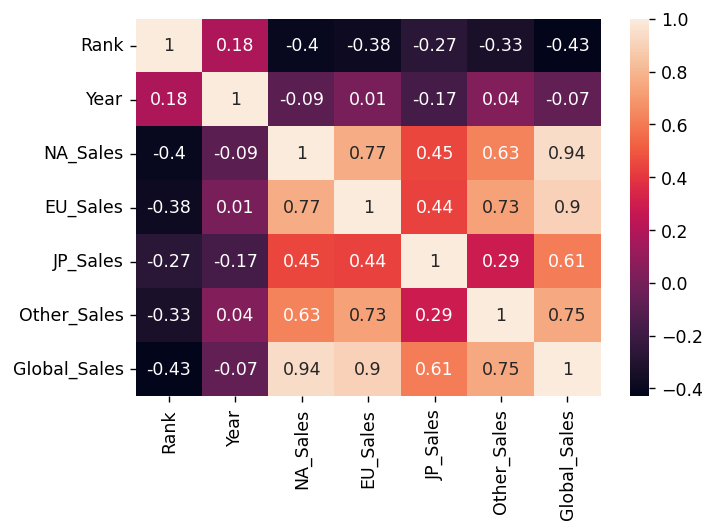

In [33]:
plt.figure(dpi=125)
sns.heatmap(np.round(data.corr(),2),annot=True)
plt.show()

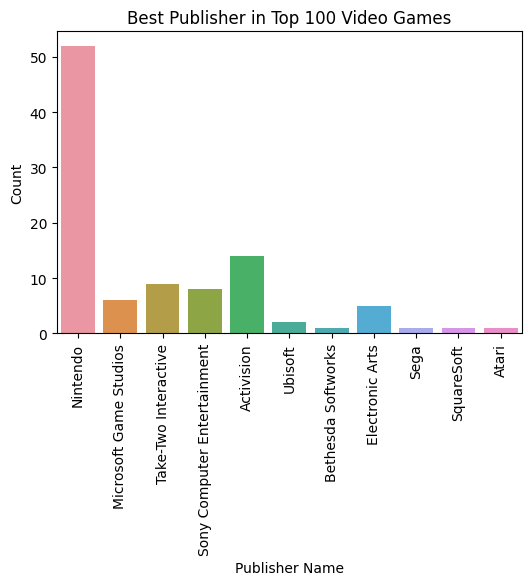

In [34]:
# Count Plot
plt.figure(dpi=100)
sns.countplot(data.head(100)['Publisher'])
plt.xlabel('Publisher Name')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Best Publisher in Top 100 Video Games')
plt.show()

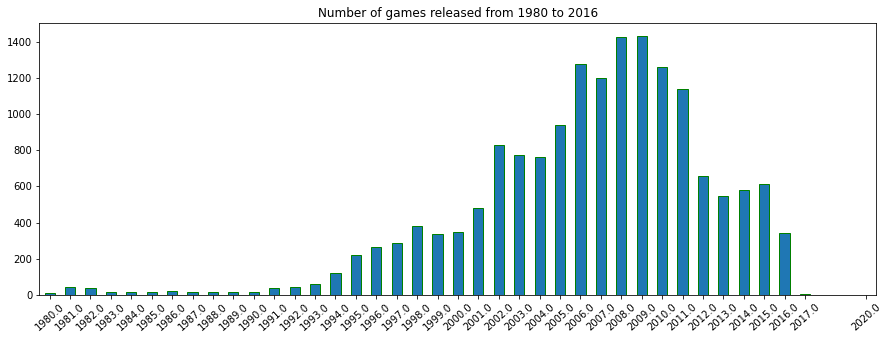

In [35]:
data.groupby('Year')['Name'].count().plot(
            kind='bar', y='name', figsize=(15,5), edgecolor='green'
)
plt.title('Number of games released from 1980 to 2016')
plt.xticks(rotation=42)
plt.xlabel('')
plt.show()

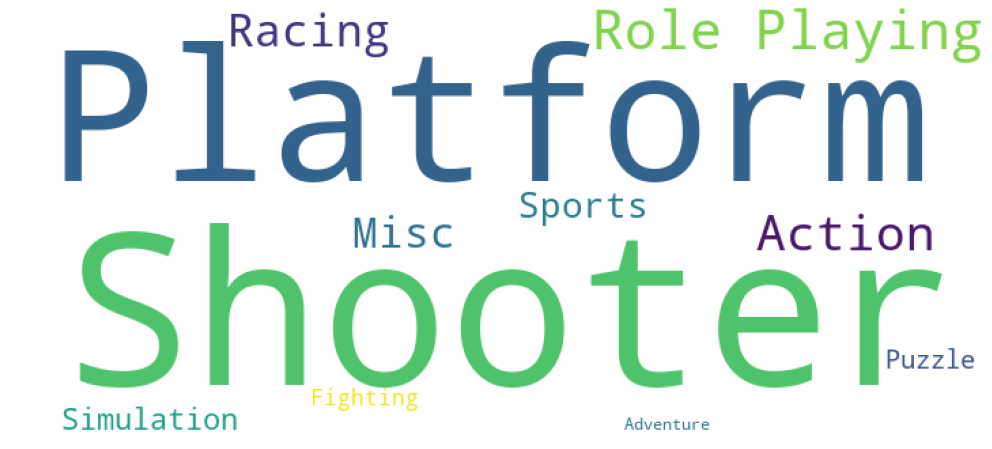

In [36]:
plt.subplots(figsize=(20,8))
wordcloud = WordCloud(background_color='White',width=720,height=320).generate(" ".join(data.head(100)['Genre']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()